1. 데이터 검색: https://www.data.go.kr/
2. 활용 데이터: https://www.data.go.kr/dataset/15012005/fileData.do

# 서울시 종합병원 분포 확인해보기

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 그래프 출력시
import matplotlib as mpl # 그래프 옵션

import seaborn as sns

# 그래프 한글성정
mpl.rc('font', family = 'Malgun Gothic') # 윈도우 사용자 기준
# mpl.rc('font', family = 'AppleGothic') # 맥북 사용자 기준

# 한글을 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수 값이 나올 경우 깨지는 현상을 방비
mpl.rc('axes', unicode_minus = False)

C:\Users\user\AppData\Local\Temp/ipykernel_13392/285299093.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 로드하기
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/data'

df_raw = pd.read_csv(f'{path}/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv')
print(df_raw.shape)
df_raw.head(2)

(91335, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742


In [4]:
df_raw.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
df_raw.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# 01. 결측치 데이터 확인하기

In [6]:
df_raw.isnull().sum() # True: 1 / False: 0

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

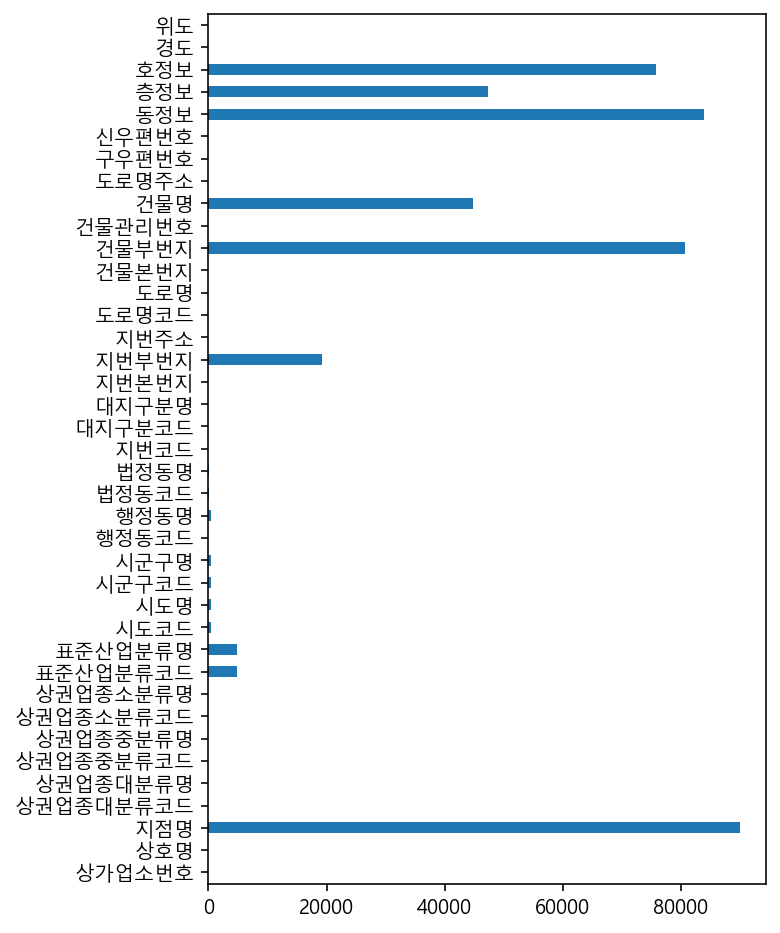

In [7]:
# 결측치 데이터 시각화
null_count = df_raw.isnull().sum()
null_count.plot.barh(figsize = (5,8))

In [8]:
null_count = null_count.reset_index()
null_count.columns = ['컬럼명','결측치 수']

In [9]:
# 결측치 데이터 중에서 상위 10개를 확인
drop_data = null_count.sort_values(by = '결측치 수', ascending = False).head(10)

In [10]:
drop_columns = drop_data['컬럼명'].tolist()
print(df_raw.shape)
df_raw =df_raw.drop(columns = drop_columns, axis = 1) # 열을 기준으로 데이터를 제거해주겠다.
print(df_raw.shape)

(91335, 39)
(91335, 29)


In [11]:
df_raw['상권업종소분류명'].nunique() #unique()

34

<AxesSubplot:>

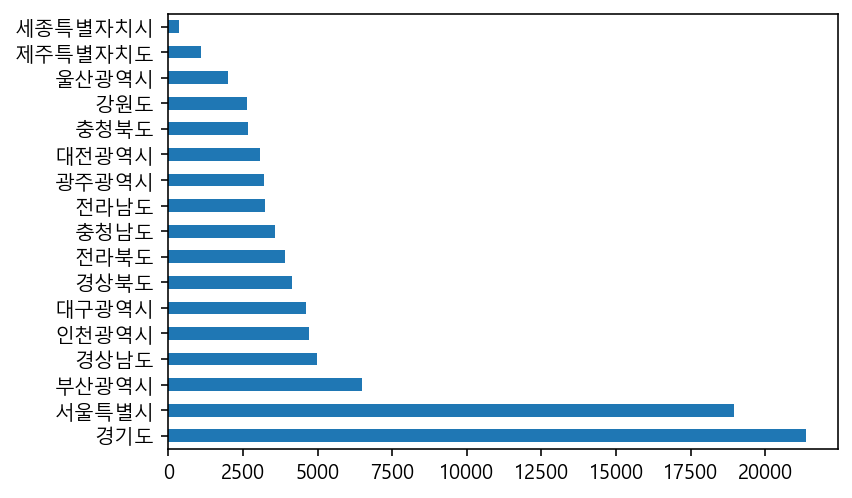

In [12]:
# 그룹화된 요약값
city = df_raw['시도명'].value_counts()
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

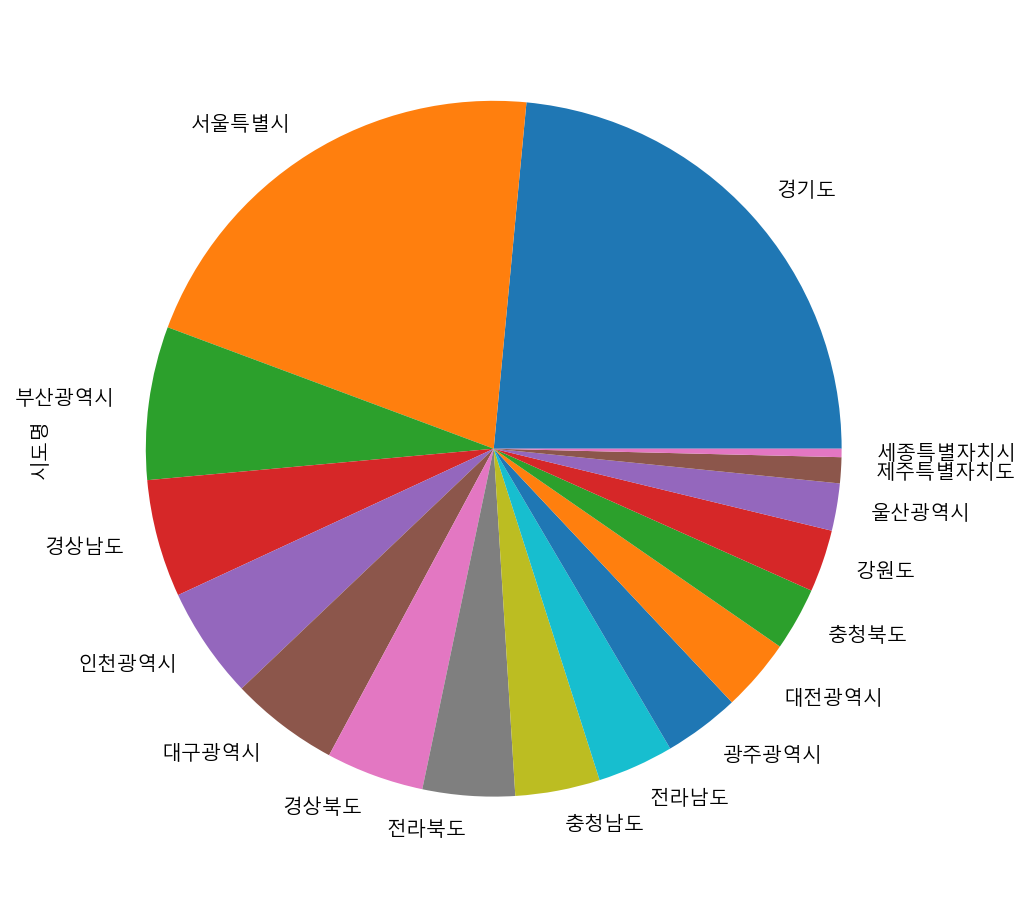

In [13]:
city.plot.pie(figsize = (8,8))

<AxesSubplot:xlabel='count', ylabel='시도명'>

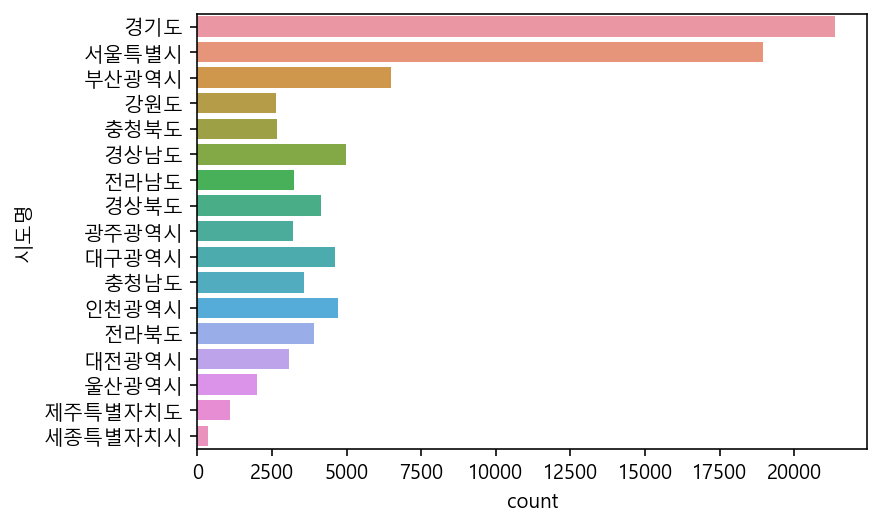

In [14]:
sns.countplot(data = df_raw, y = '시도명')

In [15]:
# 데이터 색인하기 (상권업종중분류명 -> 약국/한약방 데이터 갖고오기), 서울시 데이터만 갖고와봅시다.
df_raw[(df_raw['상권업종중분류명'] == '약국/한약방') & (df_raw['시도명'] == '서울특별시')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,...,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,...,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


In [16]:
df_raw['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

## 서울시 약국 데이터를 갖고와서 barplot으로 한번 구별로 그려봅시다.

### sol) '상권업종소분류명'에서 약국 데이터 색인 & 서울시 데이터 색인 -> 구별로 시각화

In [17]:
df_seoul_drug = df_raw[(df_raw['상권업종소분류명'] == '약국') & (df_raw['시도명'] == '서울특별시')]
df_seoul_drug # 서울특별시에 약국만을 갖고온 데이터

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,...,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,...,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,...,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


In [18]:
df_seoul_drug['시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

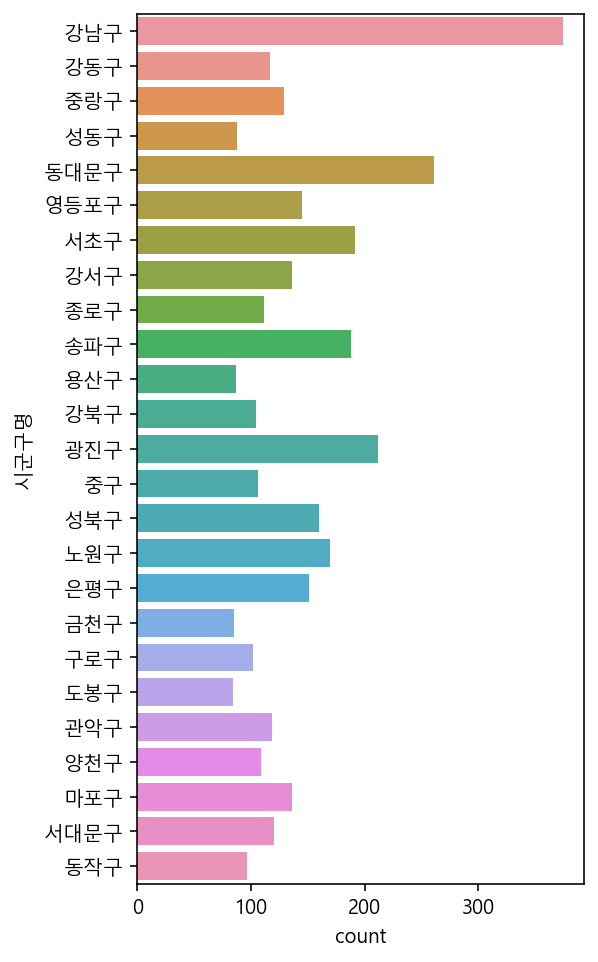

In [19]:
plt.figure(figsize = (4,8))
sns.countplot(data = df_seoul_drug, y = '시군구명')
plt.show()

sol) '상권업종소분류명'에서 종합병원 데이터 색인 & 서울시 데이터 색인 -> 구별로 몇개? 시각화?

In [20]:
df_seoul_hospital = df_raw[(df_raw['상권업종소분류명'] == '종합병원') & (df_raw['시도명'] == '서울특별시')]
print(df_seoul_hospital.shape)
df_seoul_hospital.head()

(91, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469


In [21]:
df_seoul_hospital['시군구명'].value_counts(normalize = True)

강남구     0.164835
영등포구    0.087912
광진구     0.065934
서초구     0.065934
강동구     0.054945
중구      0.054945
송파구     0.054945
강북구     0.043956
도봉구     0.043956
서대문구    0.043956
양천구     0.043956
성북구     0.032967
강서구     0.021978
중랑구     0.021978
종로구     0.021978
동대문구    0.021978
구로구     0.021978
노원구     0.021978
금천구     0.021978
성동구     0.021978
관악구     0.021978
동작구     0.010989
마포구     0.010989
용산구     0.010989
은평구     0.010989
Name: 시군구명, dtype: float64

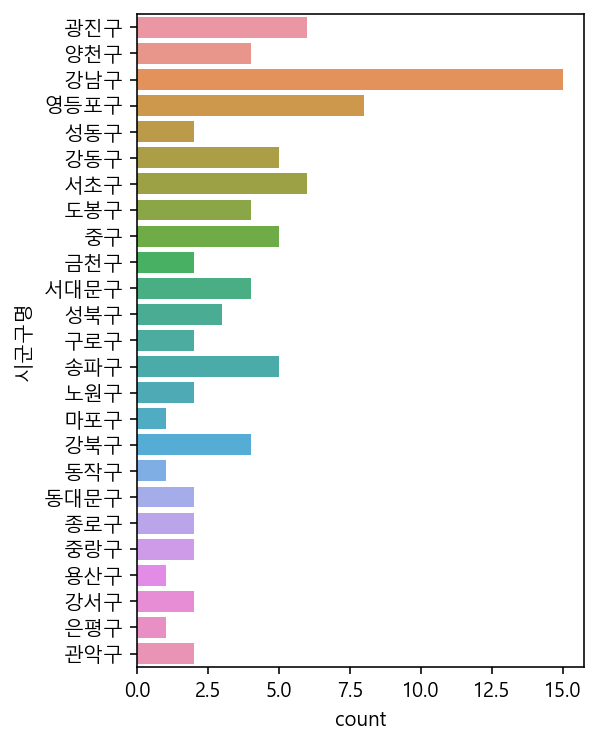

In [22]:
plt.figure(figsize = (4,6))
sns.countplot(data = df_seoul_hospital, y = '시군구명')
plt.show()

In [23]:
# 텍스트 데이터 색인하기
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [24]:
# 상호명에서 특정 단어가 있는 것을 추출 - 꽃배달
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [25]:
# 장례식장, 의원, 꽃배달, 어린이집, 상담소가 들어가 있는 상호명을 제거
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|의원|어린이집")].index
drop_row

Int64Index([ 1917,  2803,  4431,  4644,  7938,  8479, 10283, 12854, 13715,
            14966, 16091, 18047, 20200, 20415, 30706, 32889, 34459, 34720,
            35696, 37251, 45120, 47008, 49626, 51575, 55133, 56320, 56404,
            56688, 57551, 60645, 62113, 70177, 76508],
           dtype='int64')

In [26]:
drop_row = drop_row.tolist()
drop_row

[1917,
 2803,
 4431,
 4644,
 7938,
 8479,
 10283,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 47008,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 60645,
 62113,
 70177,
 76508]

In [27]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0) # 행을 기준으로 삭제(index를 기준으로 삭제)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


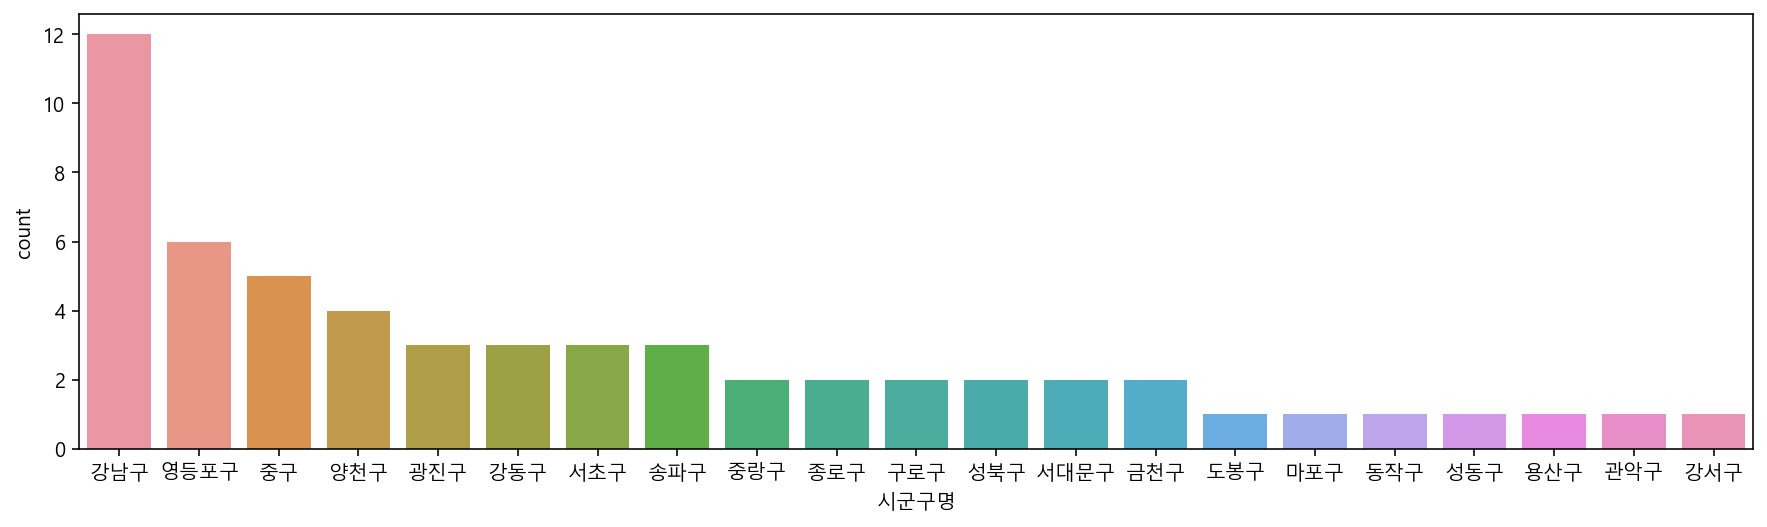

In [28]:
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul_hospital, x = '시군구명', order = df_seoul_hospital['시군구명'].value_counts().index)
plt.show()

1. 라이브러리 호출하기
2. 데이터 요약적으로 확인하기(type, shape, describe)
3. 데이터 색인하기
4. 데이터 검증하기(색인한 데이터들이 잘 정리되어 있는지 확인)
5. 데이터 시각화하기

# 참고: 위경도 데이터 시각화

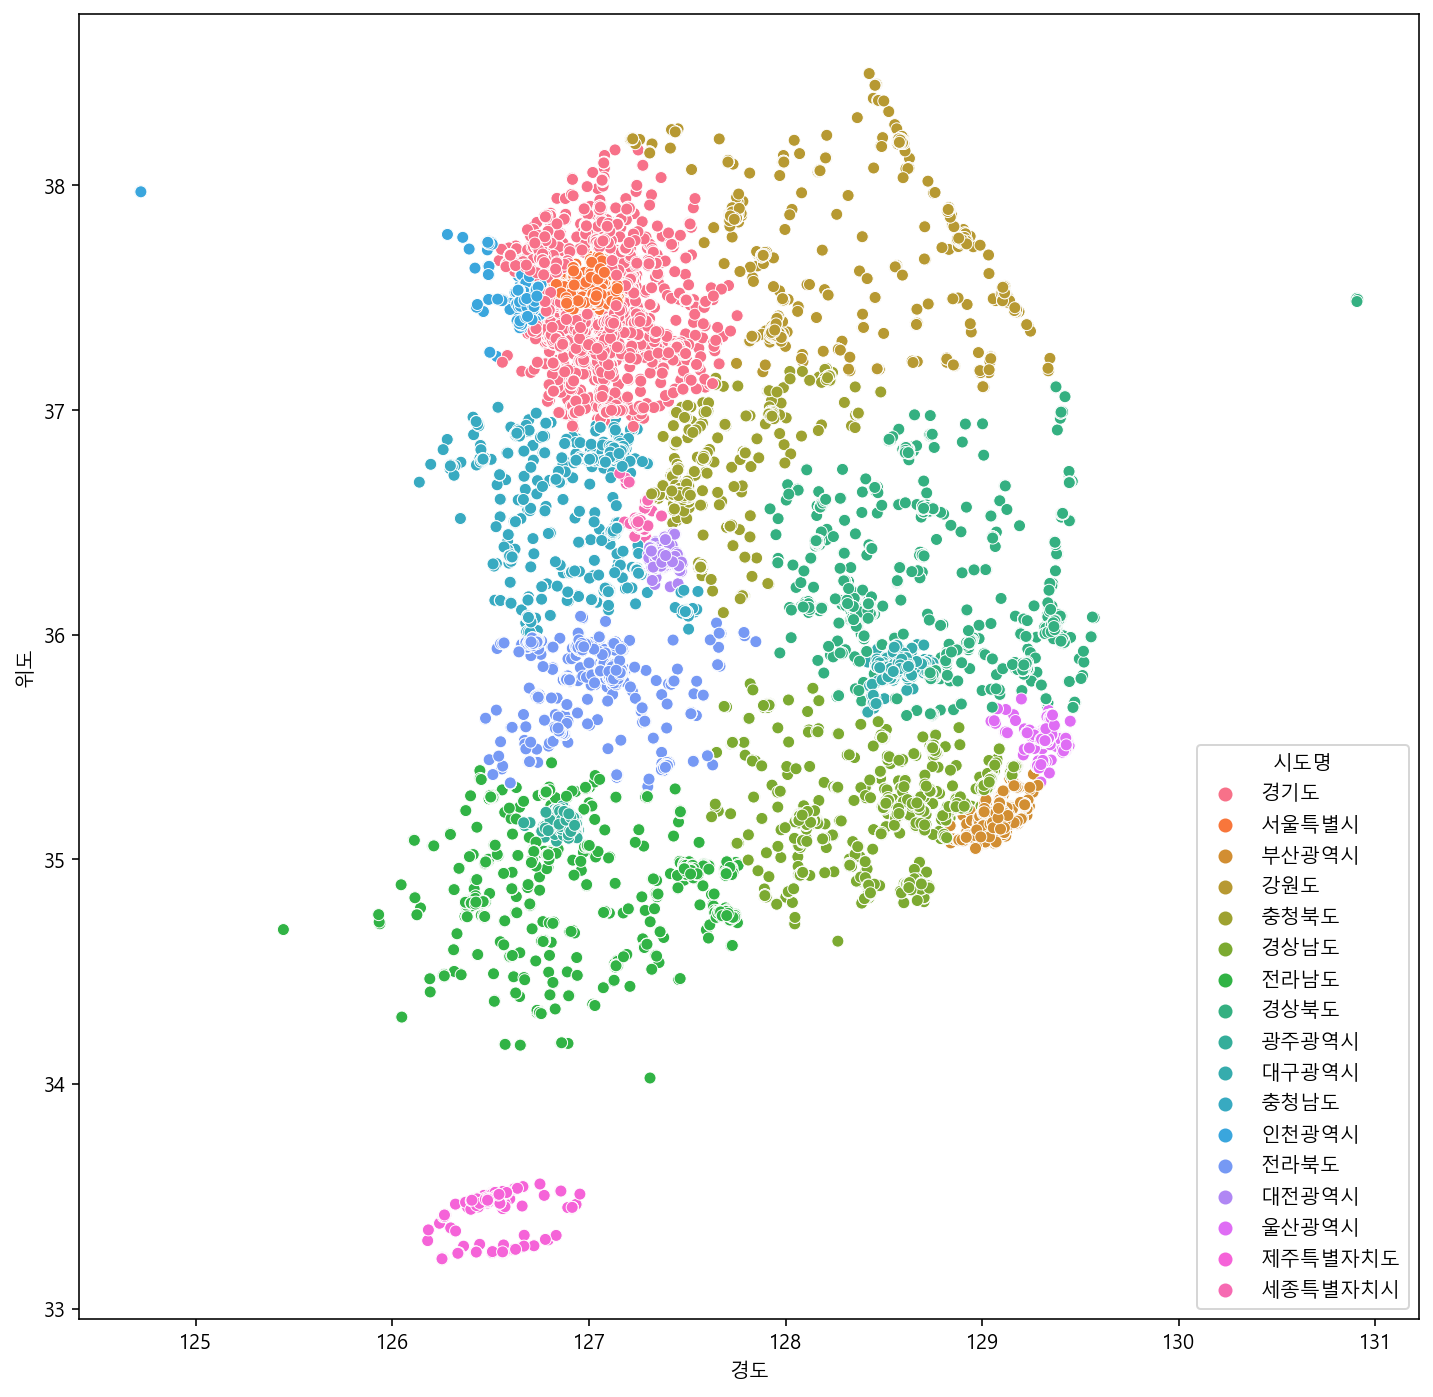

In [29]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_raw, x = '경도', y = '위도', hue = '시도명')
plt.show()

In [30]:
# 서울시 데이터 색인
df_seoul = df_raw[df_raw['시도명'] == '서울특별시']

In [31]:
df_seoul.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명',
       '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

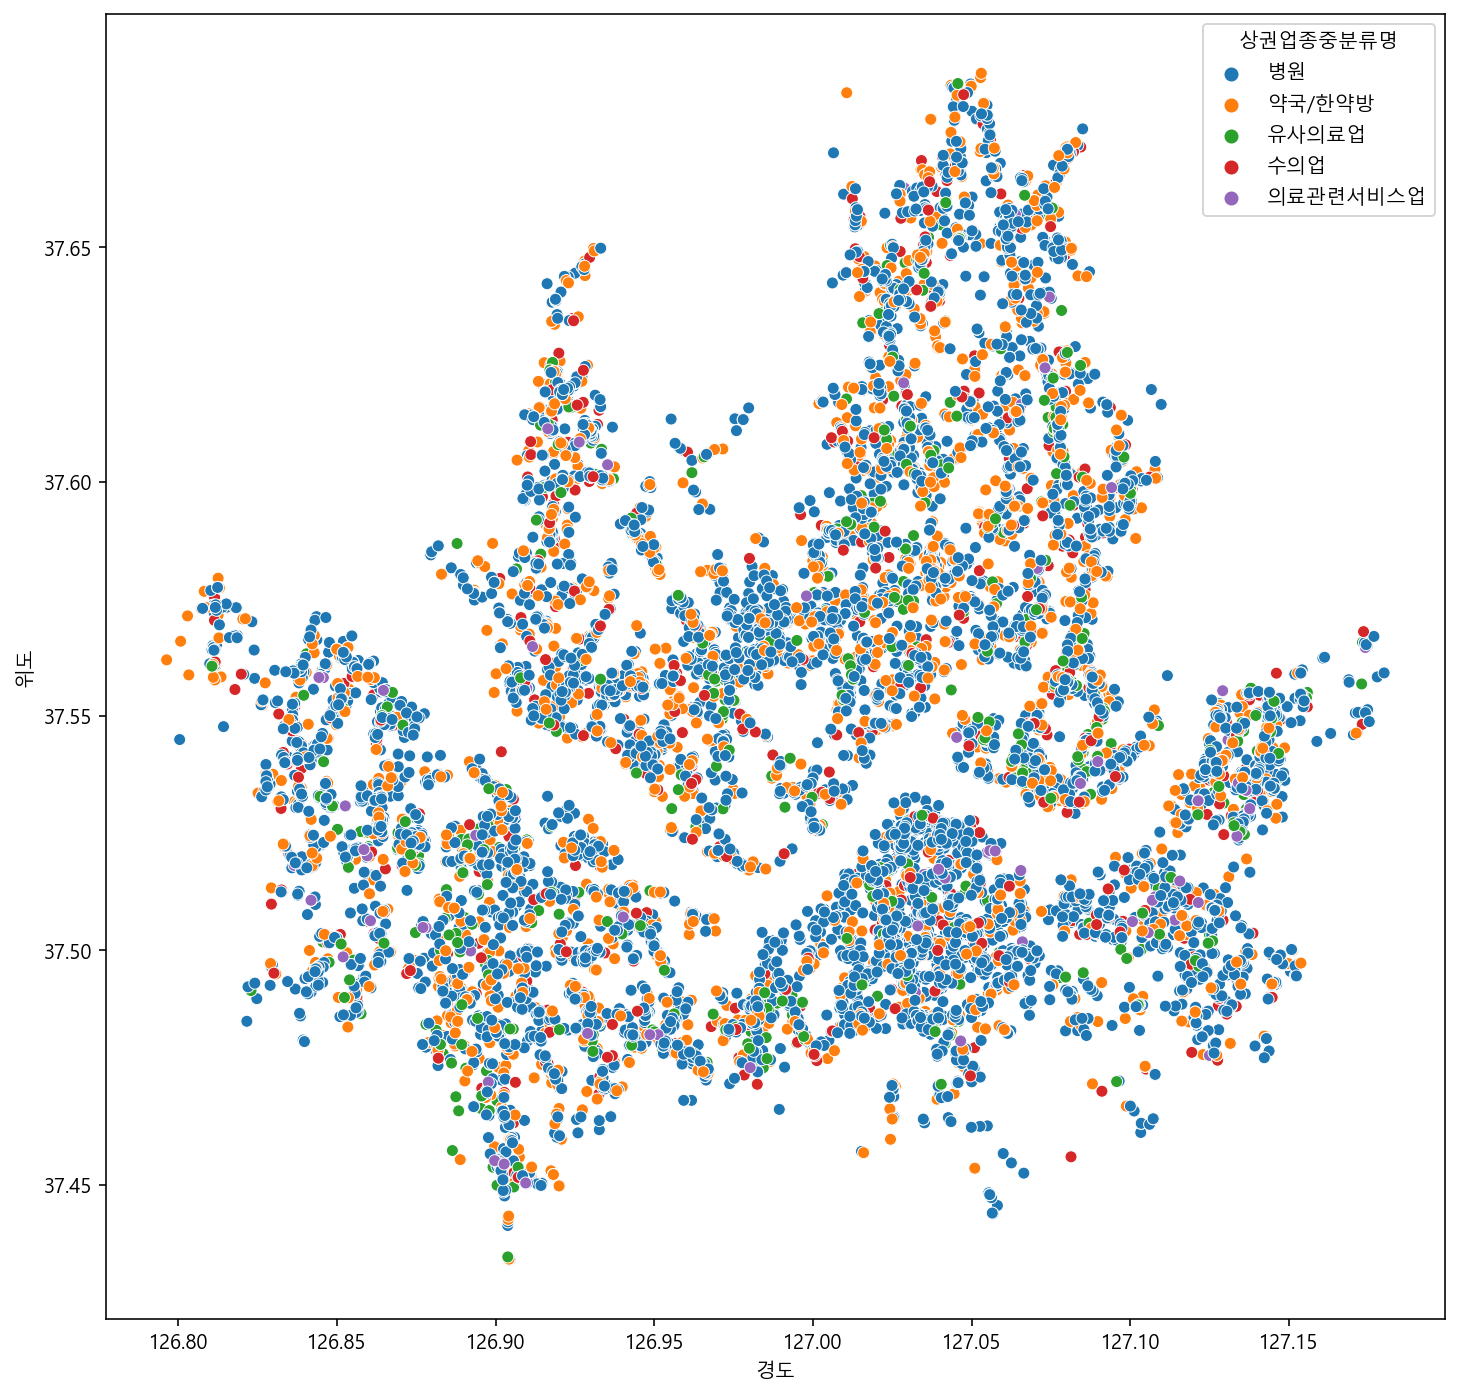

In [32]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도', hue = '상권업종중분류명')
plt.show()

# Folium 지도 라이브러리를 설치하고 활용

In [37]:
import folium

In [34]:
# 지도의 중심좌표 설정
map = folium.Map(location = [df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], zoom_start = 16)

for i in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[i, '상호명']
    address = df_seoul_hospital.loc[i, '도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[i, '위도'], df_seoul_hospital.loc[i, '경도']]
    folium.Marker(
    location = location,
    popup = popup).add_to(map)

In [35]:
map

In [36]:
pd.piv

AttributeError: module 'pandas' has no attribute 'piv'